<a href="https://colab.research.google.com/github/MrOcumare/MMO_HW/blob/master/hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача
В ходе выполнения проекта необходимо решить задачу регрессии, обучив алгоритм предсказывать данные на существующем датасете.

# Описание данных

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [25]:
%cd '/content/gdrive/My Drive/MMO/'

/content/gdrive/My Drive/MMO


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
data=pd.read_csv("births.csv")

In [28]:
data.shape

(3652, 5)

In [29]:
data.isna().sum()

year             0
month            0
date_of_month    0
day_of_week      0
births           0
dtype: int64

Отсутствующих данных нет

# Разведочный анализ

In [30]:
data.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


In [31]:
data.describe()

,year,month,date_of_month,day_of_week,births
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,1998.499726,6.523549,15.727820,3.999726,10876.817360
std,2.872293,3.449005,8.800529,2.000753,1858.566631
min,1994.000000,1.000000,1.000000,1.000000,6443.000000
25%,1996.000000,4.000000,8.000000,2.000000,8844.500000
50%,1998.500000,7.000000,16.000000,4.000000,11615.000000
75%,2001.000000,10.000000,23.000000,6.000000,12274.250000
max,2003.000000,12.000000,31.000000,7.000000,14540.000000


In [32]:
data.columns

Index(['year', 'month', 'date_of_month', 'day_of_week', 'births'], dtype='object')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           3652 non-null   int64
 1   month          3652 non-null   int64
 2   date_of_month  3652 non-null   int64
 3   day_of_week    3652 non-null   int64
 4   births         3652 non-null   int64
dtypes: int64(5)
memory usage: 142.8 KB


Проверим корреляцию между признаками

# Корреляционный анализ, выбор подходящих признаков

In [0]:
corr = data.corr()

In [35]:
corr

,year,month,date_of_month,day_of_week,births
year,1.000000,0.000125,-0.000144,-0.000786,0.085560
month,0.000125,1.000000,0.010796,0.000616,0.057037
date_of_month,-0.000144,0.010796,1.000000,0.001147,0.002530
day_of_week,-0.000786,0.000616,0.001147,1.000000,-0.661062
births,0.085560,0.057037,0.002530,-0.661062,1.000000


Построим тепловую карту корреляции для более наглядного представления

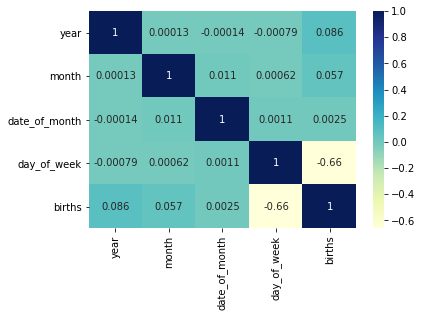

In [36]:
sns.heatmap(corr, cmap="YlGnBu", annot=True)

Построим графики, чтобы понять структуру данных

In [0]:
data = data.drop(['date'], axis=1)

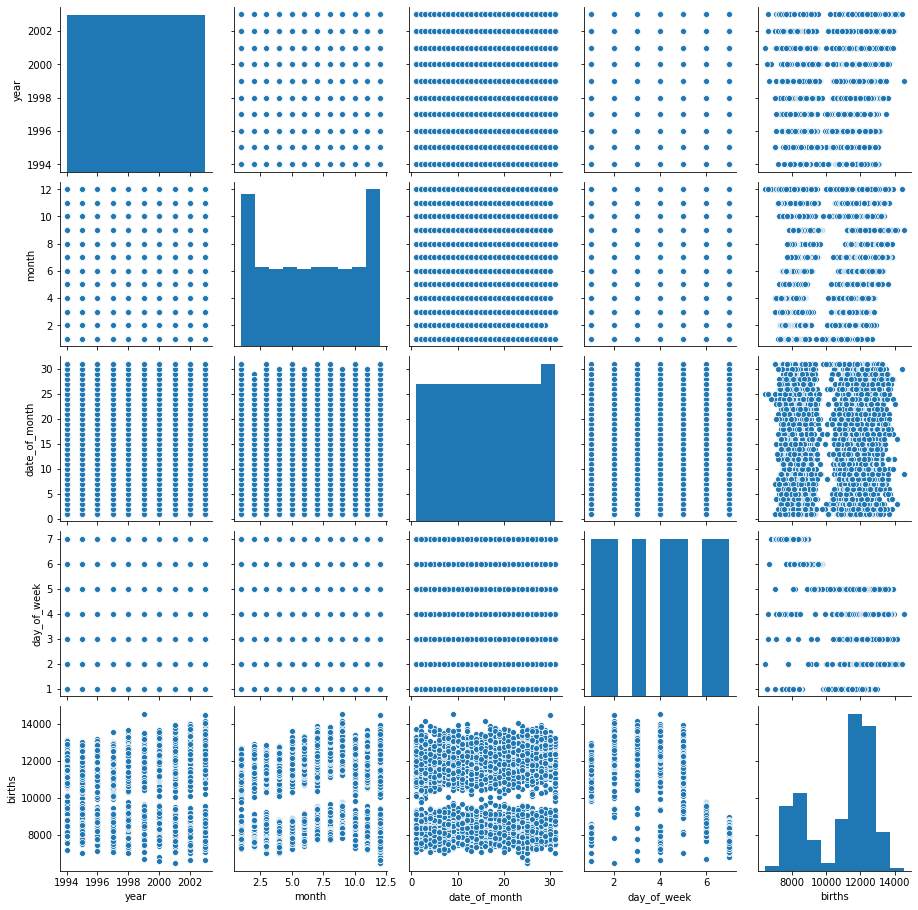

In [38]:
sns.pairplot(data)

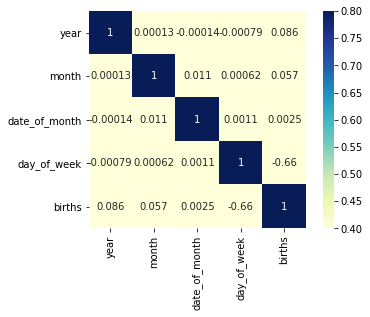

In [39]:
corr = data.corr()
sns.heatmap(corr, square=True, vmin=0.4, vmax=0.8,cmap="YlGnBu",annot=True)

Мы можем решать задачу регрессии, пытаясь предсказать шанс (%) поступления

Выделим целевой признак и нормализуем данные

In [0]:
target = data['births']
data = data.drop(['births'], axis=1)

In [0]:
from sklearn import preprocessing
data = preprocessing.scale(data)

# Метрики качества

В качестве метрик качества мы будет использовать среднюю квадратичную ошибку, среднюю абсолютную ошибку и коэффициент детерминации

Средняя квадратичная ошибка:   
$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert y_i - \hat{y_i} \rvert $  
где:     
$y$ - истинное значение целевого признака  
$\hat{y}$ - предсказанное значение целевого признака  
$N$ - размер тестовой выборки   
Чем ближе значение к нулю, тем лучше качество регрессии.   
Основная проблема метрики состоит в том, что она не нормирована.  

Средняя абсолютная ошибка:   
$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2 $   
где:   
$y$ - истинное значение целевого признака   
$\hat{y}$ - предсказанное значение целевого признака   
$N$ - размер тестовой выборки   


Коэффициент детерминации:   
$R^2(y,\hat{y}) = 1 - \frac{\sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2}{\sum\limits_{i=1}^N ( y_i - \overline{y_i} )^2} $    
где:   
$y$ - истинное значение целевого признака   
$\hat{y}$ - предсказанное значение целевого признака   
$N$ - размер тестовой выборки    
$\overline{y_i} = \frac{1}{N} \cdot \sum\limits_{i=1}^N y_i $    

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# Выбор моделей

В качестве моделей регрессии выберем модель BaggingRegressor, KneighborsRegressor и RandomForestRegressor

In [0]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Формирование обучающей и тестовой выборки

разделим выборку в пропорции 1:4

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=1)

In [46]:
X_train.shape, y_train.shape

((2921, 4), (2921,))

In [47]:
X_test.shape, y_test.shape

((731, 4), (731,))

# Базовое решение для всех моделей

In [0]:
def quality(test, predicted):
    print("  Метрики качества:")
    print("     Средняя квадратичная ошибка: "+ str(mean_squared_error(test, predicted)))
    print("     Средняя абсолютная ошибка: "+ str(mean_absolute_error(test, predicted)))
    print("     Коэффициент детерминации: "+ str(r2_score(test, predicted)))

# Подбор гиперпараметров моделей

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

### Подбор гиперпараметров для модели BaggingRegressor

In [50]:
param_grid = {
    'n_estimators' : [1, 3, 6, 9, 12, 15, 20, 25],
    'max_samples' : [0.05, 0.1, 0.2, 0.5],
    'max_features' : [1, 2, 3, 4]
}

bagging = BaggingRegressor()
grid = GridSearchCV(estimator=bagging, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_features': [1, 2, 3, 4],
                         'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [1, 3, 6, 9, 12, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.9314626289869758
BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=4, max_samples=0.5, n_estimators=25, n_jobs=None,


### Подбор параметров для KNeighborsRegressor

In [51]:
grid_params = {
    'n_neighbors': [3, 5, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsRegressor(), grid_params, verbose=1, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)
0.8955698697602491
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.9s finished


### Подбор параметров для RandomForestRegressor

In [52]:
grid_params= {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3, 5, 9, 12, 15],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}
grid = GridSearchCV(RandomForestRegressor(), grid_params, cv=2, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

# Обучение с оптимальными значениями гиперпараметров

Обучение модели BaggingRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 326462.8045198358
     Средняя абсолютная ошибка: 281.08065663474696
     Коэффициент детерминации: 0.9008414960183635
Обучение модели KNeighborsRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 375181.56312962685
     Средняя абсолютная ошибка: 373.91096966699837
     Коэффициент детерминации: 0.8860438555132081
Обучение модели RandomForestRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 294218.29359139025
     Средняя абсолютная ошибка: 276.5803051653883
     Коэффициент детерминации: 0.9106353145514942


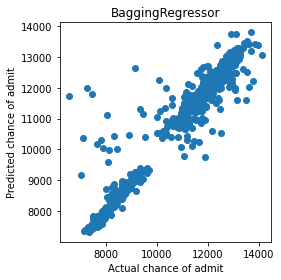

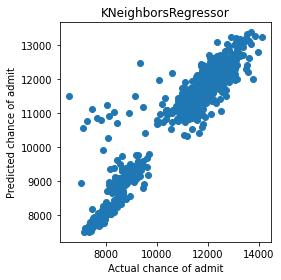

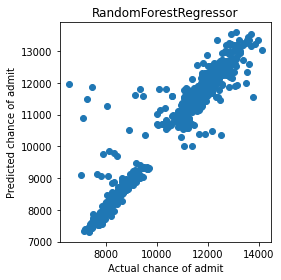

In [53]:
models = [BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=4, max_samples=0.5, n_estimators=25, n_jobs=None,
                 oob_score=False, random_state=None, verbose=0,
                 warm_start=False), 
          KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='distance'), 
          RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
         ]

for model in models:
    print("=========================================")
    print("Обучение модели "+type(model).__name__)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test) 
    plt.figure(figsize=(4, 4)) 
    plt.scatter(y_test,predicted) 
    plt.title(type(model).__name__)
    plt.xlabel('Actual chance of admit')
    plt.ylabel('Predicted chance of admit')
    plt.tight_layout()
    quality(y_test, predicted)

Лучшей оказалась модель  RandomForestRegressor.
Оптимизация гиперпараметров не дала большого эффекта. 

Метрики качества показывают, что все модели, построенные в результате выполнения проекта, являются достаточно хорошими для их использования. При этом ансамблевые методы показали себя лучше классического алгоритма

# Выводы
В ходе выполнения проекта по анализу данных был выбран датасет для решения задачи регрессии.   
Были выбраны 3 модели, входящие в пакет sci-kit learn, и метрики качества, подходящие для регрессионного анализа.    
В ходе разведочного анализа были удалены отсутствующие значения, сильно коррелирующие между собой признаки.  
После проведенной оптимизации параметров моделей был сделан вывод о лучшей модели для данной задачи. Ею оказалась модель  RandomForestRegressor.